In [1]:
import pandas as pd 
from Response_Spectrum import *
from sympy import symbols, Eq, Function,UnevaluatedExpr, Mul
from sympy import *

init_printing()
from sympy import Piecewise, nan
import numpy as np


0.75


In [2]:
def round_expr(expr, num_digits=2):
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(Number)})

def round_equation(eq, num_digits=2):
    lhs = eq.lhs
    rhs = eq.rhs
    rounded_rhs = round_expr(rhs, num_digits)
    return Eq(lhs, rounded_rhs)

In [3]:
m,n, W_SS, W_PP, W_eff, T=symbols ('m n  W_SS  W_PP  W_eff T')
PGA, S_1, S_S=symbols('PGA, S_1, S_S')
F_pga, F_a, F_v=symbols('F_pga F_a F_v')
d_isol, d_y, F_isol, F_y,K_d, K_isol,K_u, Q_d=symbols('d_isol d_y F_isol  F_y K_d K_isol K_u  Q_d')
C_sm, F_pga, F_a, F_v, A_S, S_DS,S_D1=symbols('C_sm F_pga F_a F_v A_S S_DS S_D1')

d=symbols ('d')
T_eff,B_L=symbols('T_eff B_L')

In [4]:
#C_sm_val, F_pga_val, F_a_val, F_v_val, A_S_val, S_DS_val, S_D1-val=
#C_sm, F_pga, F_a, F_v, A_S, S_DS,S_D1
C_sm_val, F_pga_val, F_a_val, F_v_val, A_S_val, S_DS_val, S_D1_val=AASHTO(T=1, PGA=0.4,S_S=0.75,S_1=0.2,SiteClass="B")
# Convert the first element of the array to a numpy number
scalar_value = C_sm_val.item()

In [5]:
#Eq(C_sm,scalar_value)

In [6]:
xi = symbols('xi')
def B_L_func(xi):
    
    if xi<0.3:
        val=(xi/0.05)**0.3
    else:
        val=1.7
    
    return val
    

In [7]:
B_L_func(xi=0.05)

(1)
Structure displacement, $d$. One way to make this estimate is to assume the effective isolation period, $T_{eff}$, is $1.0$ second, take the viscous damping ratio, $\xi$ , to be 5 percent, and calculate
the displacement using Eq. B2.7.2.1.1-1 (The damping factor, $B_L$, is given by Eq. 7.1-3, and equals $1.0$ in this case.)
Article C7.1 $d = \frac{9.79 S_{D1}T_{eff}}{B_L} \approx 10 S_{D1} $
(B2.7.2.1.1-1)

In [8]:

def d_func(S_D1=S_D1, T_eff=T_eff, B_L=B_L):
    
    #S_D1=UnevaluatedExpr('S_D1')
    #T_eff=UnevaluatedExpr('T_eff')
    #B_L=UnevaluatedExpr('B_L')
    #d=UnevaluatedExpr('d') 
    
    val= 9.79*S_D1*T_eff/B_L
    
    return Eq(d, val, evaluate=False)

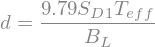

In [9]:
d_func()

In [10]:
d_val=d_func(S_D1=S_D1_val,T_eff=1.0, B_L=B_L_func(xi=0.05)).rhs

display(d_val)

(2) Characteristic strength, $Q_d$. This strength needs to be high enough that yield does not occur under non-seismic loads (e.g., wind) but low enough that yield will occur during an earthquake. Experience has shown that taking $Q_d$ to be $5$ percent of the bridge weight is a good starting point, i.e.,
$Q_d =0.05 W$ (B2.7.2.1.1-2)

In [11]:
Q_d, W=symbols('Q_d W')

def Q_d_func(W=W):
    val= 0.05*W
    return round_equation(Eq(Q_d, val, evaluate=False))

In [12]:
Q_d_func(W=678.62)

(3) Post-yield stiffness, $K_d$.
Article 12.2 requires that all isolators exhibit a minimum lateral restoring force at the design displacement, which translates to a minimum post-yield stiffness, $K_{d,min}$, given by Eq. B2.7.2.1.1-3.

In [13]:
K_d= symbols('K_d')
def K_d_func(W=W,d=d):
    K_d_min= 0.025*W/d
    return round_equation(Eq(K_d, 2*K_d_min, evaluate= False))

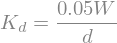

In [14]:
display(K_d_func())
W_val=678.62
display(K_d_func(W=W_val, d=d_val))

## B2.7.2.1.2—Step B1.2: Initial Isolator Properties at Supports, Example 1.6
Calculate the characteristic strength, $Q_{d,j}$, and post- elastic stiffness, $K_{d,j}$, of the isolation system at each support $“j”$ by distributing the total calculated strength, $Q_d$, and stiffness, $K_d$, values in proportion to the dead load applied at that support:
$$Q_{d,j} = Q_d \frac{W j}{W} \qquad (B2.7.2.1.2-1)  $$ 

and 

$$K_{d,j} = K_d \frac{W_j}{W}\qquad  (B2.7.2.1.2-2)$$





In [15]:
# Input W_j=[W_1,W_2,W_3,W_4]
W0=[51.98,287.33,287.33,51.98]

W_j, Q_dj, K_dj=symbols ('W_j Q_dj K_dj')

def Q_dj_func(Q_d=Q_d, W_j=W_j, W=W):
    
    val = Q_d * W_j / W
    
    return round_equation(Eq(Q_dj, val, evaluate=False ))

def K_dj_func(K_d=K_d, W_j=W_j, W=W):
    
    val = K_d * W_j / W
    
    return round_equation(Eq(K_dj, val, evaluate=False ))
  



In [16]:
Q_d_val=Q_d_func(W=W_val).rhs

print(Q_d_val)

K_d_val=K_d_func(W=W_val,d=d_val).rhs

print(K_d_val)



33.93
17.33


In [17]:
Q_dj_list=[]
K_dj_list=[]
for j in range(1, len(W0) + 1):
    print(f'j={j}:')
    
    Q_d_val=Q_d_func(W=W_val).rhs
    K_d_val=K_d_func(W=W_val,d=d_val).rhs
    
    val_Q = Q_dj_func(Q_d=Q_d_val, W_j=W0[j-1], W=W_val).rhs
    val_K = K_dj_func(K_d=K_d_val, W_j=W0[j-1], W=W_val).rhs
    
    print(f' Q_dj={val_Q}')
    print(f' K_dj={val_K}\n')
    
    Q_dj_list.append(val_Q)
    
    K_dj_list.append(val_K)
    
    

j=1:
 Q_dj=2.60
 K_dj=1.33

j=2:
 Q_dj=14.37
 K_dj=7.34

j=3:
 Q_dj=14.37
 K_dj=7.34

j=4:
 Q_dj=2.60
 K_dj=1.33



## B2.7.2.1.3—Step B1.3: Effective Stiffness of Combined Pier and Isolator System, Example 1.6

In [18]:
Q_dj_list
K_dj_list
K_subj= symbols('K_subj')
alpha_j_list=[]

for j in range(len(Q_dj_list)):
   
    Q_dj=Q_dj_list[j]
    K_dj=K_dj_list[j]
        
    K_subj=10000 # kips/in
    d=d_val
    print(f'j={j+1}:')
    alpha_j=(K_dj*d+Q_dj)/(K_subj*d-Q_dj)
    alpha_j=alpha_j.round(5)
    print(f' alpha_{j+1}={alpha_j}')
    alpha_j_list.append(alpha_j)


alpha_j_list
    

j=1:
 alpha_1=0.00027
j=2:
 alpha_2=0.00147
j=3:
 alpha_3=0.00147
j=4:
 alpha_4=0.00027


In [19]:
alpha_j_list

K_effj_list=[]

for j in range(len(alpha_j_list)):
    print(f'j={j+1}:')
    alpha_j=alpha_j_list[j]
    K_subj=10000 # kips/in
    K_effj= alpha_j*K_subj/(1-alpha_j)
    print(f' K_eff_{j+1}={K_effj}')
    K_effj_list.append(K_effj)
    
    

j=1:
 K_eff_1=2.7
j=2:
 K_eff_2=14.7
j=3:
 K_eff_3=14.7
j=4:
 K_eff_4=2.7


In [20]:
K_effj_list

## B2.7.2.1.4—Step B1.4: Total Effective Stiffness, Example 1.6

Calculate the total effective stiffness, Keff, of the bridge:

Eq. 7.1-6  $$\qquad  K_{eff}=\sum_{j=1}^{m} K_{eff,j}\qquad  (B2.7.2.1.4-1)$$



In [21]:
K_eff=symbols('K_eff')

K_eff_val=sum(K_effj_list)

Eq(K_eff, K_eff_val)

## B2.7.2.1.5—Step B1.5: Isolation System Displacement at Each Support, Example 1.6

Calculate the displacement of the isolation system at support $‘j’$,  $d_{isol,j}$, for all supports:

$$ d_{isol,j}= \frac{d}{1+\alpha_j}\qquad  (B2.7.2.1.5-1)$$



In [22]:
d_isol_j_list=[]
for alpha_j in alpha_j_list:
    d_isol_j= d/(1+alpha_j)
    d_isol_j_list.append(d_isol_j)
d_isol_j_list    

 ## B2.7.2.1.6—Step B1.6: Isolation System Stiffness at Each Support, Example 1.6
 
 Calculate the effective stiffness of the isolation system at support $“j”$, $K_{isol,j}$, for all supports:
 
 $$ K_{isol,j}=\frac{Q_{d,j}}{d_{isol,j}}+K_{d,j} \qquad (B2.7.2.1.6-1)$$
 

In [23]:
m= len(alpha_j_list)

In [24]:
K_isol_j_list=[]
for j in range(m):
    K_isol_j=round(Q_dj_list[j]/d_isol_j_list[j]+K_dj_list[j],2)
    K_isol_j_list.append(K_isol_j)
    
K_isol_j_list
    
    

## B2.7.2.1.7—Step B1.7: Substructure Displacement at Each Support, Example 1.6
Calculate the displacement of substructure $“j”$, $d_{sub,j}$, for all supports:

$$d_{sub,j} = d − d_{isol, j} \qquad (B2.7.2.1.7-1)$$

In [37]:
d_sub_j_list=[d-d_isol_j_list[j] for j in range(m)]

d_sub_j_list


## B2.7.2.1.8—Step B1.8: Lateral Load in Each Substructure Support, Example 1.6

Calculate the shear at support $“j”$, $F_{sub,j}$, for all supports:

$$F_{sub,j} =K_{sub,j}d_{sub,j} \qquad (B2.7.2.1.8-1)$$

In [26]:
K_sub_j_list=[10000,307,307,10000]# kips/in
F_sub_j_list=[K_sub_j_list[j]*d_sub_j_list[j] for j in range(m)]
F_sub_j_list

## B2.7.2.1.9—Step B1.9: Column Shear Force at Each Support, Example 1.6

Calculate the shear in column $“k”$ at support $“j”$,
$F_{col,j,k}$, assuming equal distribution of shear for all
columns at support “j”:
$$ F_{col,j,k}=\frac{F_{sub,j}}{\text{#of columns at support j}}\qquad (B2.7.2.1.9-1)$$

Use these approximate column shear forces as a
check on the validity of the chosen strength and
stiffness characteristics.

In [27]:
num_cols_per_support=[6,3,3,6]
F_col_jk_list=[F_sub_j_list[j]/num_cols_per_support[j] for j in [1,2]]
F_col_jk_list

## B2.7.2.1.10—Step B1.10: Effective Period and Damping Ratio, Example 1.6

Calculate the effective period, $T_{eff}$, and the viscous
damping ratio, $\xi$ , of the bridge:
$$ T_{eff}=2\pi\sqrt{\frac{W_{eff}}{gK_{eff}}} \qquad (B2.7.2.1.10-1)$$

and 

$$\text{Eq. 7.1-10} \qquad \qquad  \qquad \xi=\frac{2\sum_j[Q_d(d_i-d_y)]}{\pi\sum_j[K_{eff,j}(d_i+d_{sub})^2]}\qquad (B2.7.2.1.10-2)$$


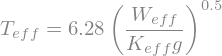

In [28]:
W_eff_val=830.14
g_val=386.4

T_eff, W_eff, K_eff, g= symbols("T_eff W_eff K_eff g")
def T_eff_func(W_eff=W_eff,K_eff=K_eff, g=g):
    val=2*np.pi*((W_eff/(g*K_eff))**(1/2))    
    return round_equation(Eq(T_eff, val, evaluate=False),2)


display(T_eff_func())
    
T_eff_val=   T_eff_func(W_eff=W_eff_val,K_eff=K_eff_val, g=g_val).rhs
display(T_eff_func(W_eff=W_eff_val,K_eff=K_eff_val, g=g_val))    





In [29]:

# Calculate new \xi

def xi_func(Q_d,K_eff,d_i,d_y,d_sub):
    val_numerator = 2 * sum([(Q_d_j * (d_i_j - d_y_j)) for Q_d_j, d_i_j, d_y_j in zip(Q_d, d_i, d_y)])
    val_denominator = np.pi*sum([(K_eff_j*(d_i_j + d_sub_j) ** 2) for K_eff_j, d_i_j, d_sub_j in zip(K_eff, d_i, d_sub)])
    val = val_numerator / val_denominator
    
    return val
        
    



In [30]:
Q_d=Q_dj_list

K_eff=K_effj_list

d_i=d_isol_j_list

d_y=[0]*m
d_sub=d_sub_j_list

xi_new=xi_func(Q_d,K_eff,d_i,d_y,d_sub)
xi_new

In [31]:
B_L_val=B_L_func(xi=xi_new)

display(B_L_val)



In [34]:
# New displacement

d_new=d_func(S_D1=S_D1_val, T_eff= T_eff_val, B_L=B_L_val).rhs

In [35]:
display(d_new)

In [38]:
a=[1,2,3]
b=[4,5,6]

In [44]:
c=sum([a[i]*b[i] for i in range(len(a))])
c